In [22]:
import os
from matplotlib import pylab as plt
from os import path
from numpy import array, maximum, minimum, median
import numpy

In [2]:
%matplotlib inline
plt.style.use(['dark_background', 'bmh'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')
plt.rc('figure', figsize=(20,5))

In [3]:
N = 20
seeds = [i for i in range(10)]
success = list(list() for seed in seeds)
performance_path = '/misc/vlgscratch4/LecunGroup/nvidia-collab/models_v12/planning_results/'
name = 'MPUR-policy-gauss-model=vae-zdropout=0.5-policy-gauss-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=0.2-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=1-seed={seed}' + \
       '-novaluestep{step}.model.log'
steps = [(i + 1) * 5000 for i in range(N)]

for seed in seeds:
    for step in steps:
        file_name = path.join(performance_path, name.format(seed=seed, step=step))
        if os.path.isfile(file_name):
            with open(file_name) as f:
                success[seed - 1].append(float(f.readlines()[-1].split()[-1]))
        else:
            success[seed - 1].append(None)

(5000, 105000)

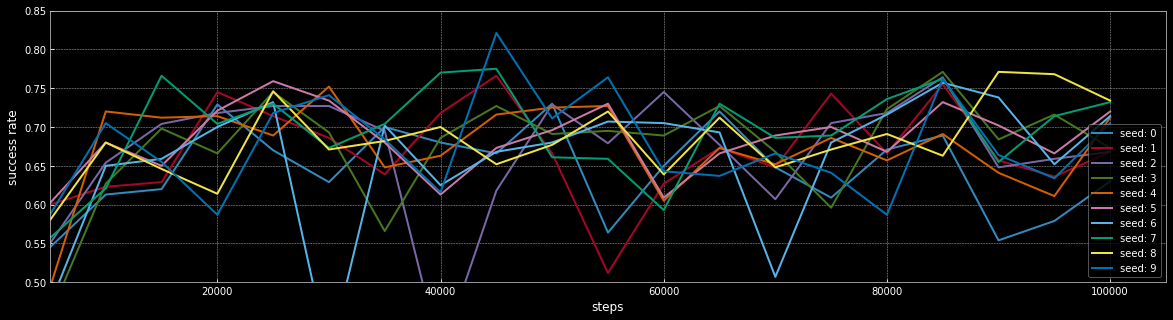

In [4]:
if success[0][0] is None:
    for seed in seeds:
        plt.plot(steps[1::2], success[seed - 1][1::2], label=f'seed: {seed}')
else:
    for seed in seeds:
        plt.plot(steps, success[seed - 1], label=f'seed: {seed}')
plt.grid(True)
plt.xlabel('steps')
plt.ylabel('success rate')
plt.legend()
plt.ylim([0.40, 0.80])
plt.ylim([0.50, 0.85])
plt.xlim([5_000, 105_000])

In [5]:
N = 20
performance_path = '/misc/vlgscratch4/LecunGroup/nvidia-collab/models_v12/planning_results/'
n = dict(); s = 'stc'; d = 'dtr'
n[s] = 'MPUR-policy-gauss-model=vae-zdropout=0.5-policy-gauss-nfeature=256-bsize=6-npred=30-ureg=0.05' + \
       '-lambdal=0.2-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=1-seed={seed}' + \
       '-novaluestep{step}.model.log'
n[d] = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05-lambdal=0.2' + \
       '-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=1-seed={seed}-novaluestep{step}.model.log'
name = n
steps = [(i + 1) * 5000 for i in range(N)]

seeds = dict(
    stc=[i for i in range(10)],
    dtr=[i + 1 for i in range(3)],
)
success = {k: list(list() for seed in seeds[k]) for k in seeds}

for k in seeds:
    for seed in seeds[k]:
        for step in steps:
            file_name = path.join(performance_path, name[k].format(seed=seed, step=step))
            with open(file_name) as f:
                success[k][seed - 1].append(float(f.readlines()[-1].split()[-1]))

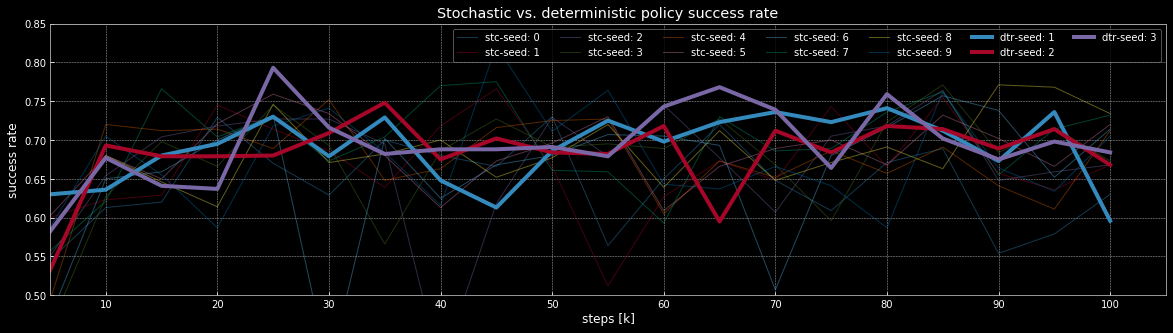

In [6]:
for k in seeds:
    for seed in seeds[k]:
        plt.plot(
            array(steps) / 1e3, success[k][seed - 1],
            label=f'{k}-seed: {seed}',
            alpha=.4 if k is 'stc' else 1,
            linewidth=4 if k is 'dtr' else 1
        )
plt.grid(True)
plt.xlabel('steps [k]')
plt.ylabel('success rate')
plt.legend(ncol=7)
plt.ylim([0.50, 0.85])
plt.xlim([5, 105])
plt.title('Stochastic vs. deterministic policy success rate')
plt.xticks(range(10, 100 + 10, 10));

# plt.savefig('Stc-vs-dtr-success_rate.png', bbox_inches = 'tight')

In [7]:
performance_path = '/misc/vlgscratch4/LecunGroup/nvidia-collab/models_v{version}/planning_results/'
n = dict(); r = 'rgr'; h = 'hrd'  # regressed / hardwired
v = {r: 12, h: 13}
N = {r: 20, h: 24}
n[r] = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05-lambdal=0.2' + \
       '-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=1-seed={seed}-novaluestep{step}.model.log'
n[h] = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05-lambdal=0.2' + \
       '-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=False-seed={seed}-novaluestep{step}.model.log'
names = n
steps = {k: [(i + 1) * 5000 for i in range(N[k])] for k in names}

seeds = [i + 1 for i in range(3)]
success = {k: list(list() for seed in seeds) for k in names}

for k in names:
    for seed in seeds:
        for step in steps[k]:
            file_name = path.join(performance_path.format(version=v[k]), names[k].format(seed=seed, step=step))
            with open(file_name) as f:
                success[k][seed - 1].append(float(f.readlines()[-1].split()[-1]))

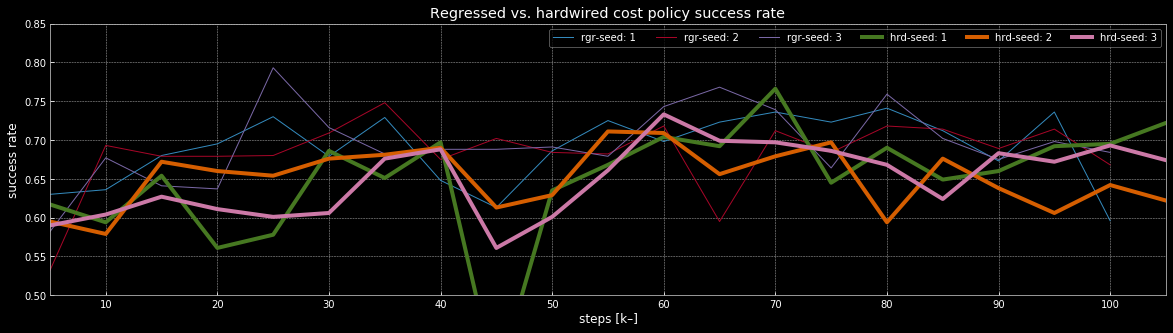

In [16]:
for k in names:
    for seed in seeds:
        plt.plot(
            array(steps[k]) / 1e3, success[k][seed - 1],
            label=f'{k}-seed: {seed}',
            linewidth=4 if k is h else 1
        )
plt.grid(True)
plt.xlabel('steps [k–]')
plt.ylabel('success rate')
plt.legend(ncol=7)
plt.ylim([0.50, 0.85])
plt.xlim([5, 105])
plt.title('Regressed vs. hardwired cost policy success rate')
plt.xticks(range(10, 100 + 10, 10));

plt.savefig('Rgr-vs-hrd-success_rate.png', bbox_inches = 'tight')

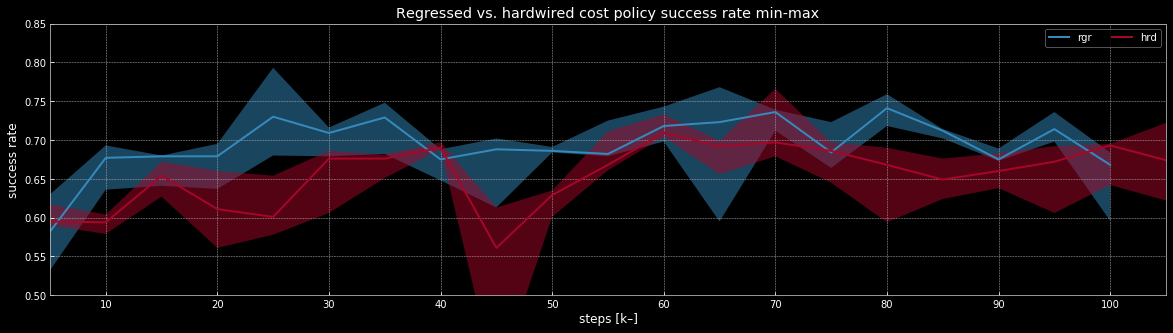

In [45]:
success_arr = {k: array(success[k]) for k in names}
# stats = ('min', 'max', 'median')
for k in names:
    plt.plot(
        array(steps[k]) / 1e3, numpy.median(success_arr[k], 0),
        label=f'{k}',
        linewidth=2,
    )
for k in names:
    plt.fill_between(
        array(steps[k]) / 1e3, success_arr[k].min(0), success_arr[k].max(0),
        alpha=.5,
    )
plt.grid(True)
plt.xlabel('steps [k–]')
plt.ylabel('success rate')
plt.legend(ncol=7)
plt.ylim([0.50, 0.85])
plt.xlim([5, 105])
plt.title('Regressed vs. hardwired cost policy success rate min-max')
plt.xticks(range(10, 100 + 10, 10));

plt.savefig('Rgr-vs-hrd-success_rate-min-max.png', bbox_inches = 'tight')